In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv(r'C:\Users\uzair\Desktop\DataScience\Sales_Prediction/advertising.csv')
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [8]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

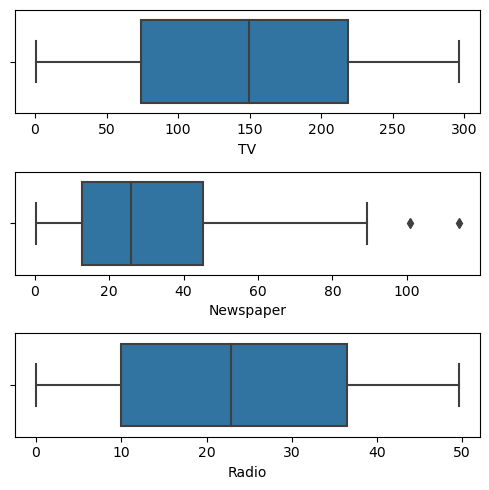

In [67]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
sns.boxplot(df['TV'], ax = axs[0])
sns.boxplot(df['Newspaper'], ax = axs[1])
sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()
plt.show()

###### There are no considerable outliers present in the data.

<Figure size 500x500 with 0 Axes>

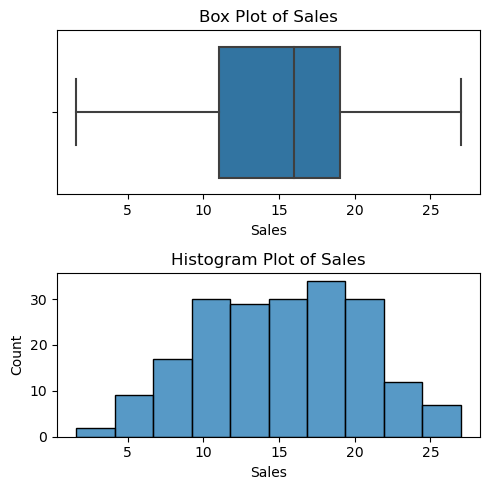

In [105]:
plt.figure(figsize=(5,5))
fig, axs = plt.subplots(2, figsize=(5,5))
sns.boxplot(df['Sales'], ax=axs[0])
axs[0].set_title('Box Plot of Sales')

sns.histplot(df['Sales'], ax=axs[1])
axs[1].set_title('Histogram Plot of Sales')
plt.tight_layout()
plt.show()

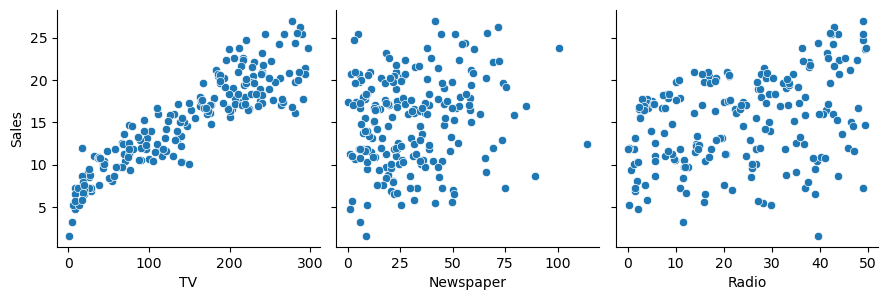

In [95]:
# Let's see how Sales are related with other variables using scatter plot.

sns.pairplot(data=df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=3, kind='scatter')
plt.show()

###### From above graph we can see that advertising budget of TV versus Sales shows Linear Relationsip.

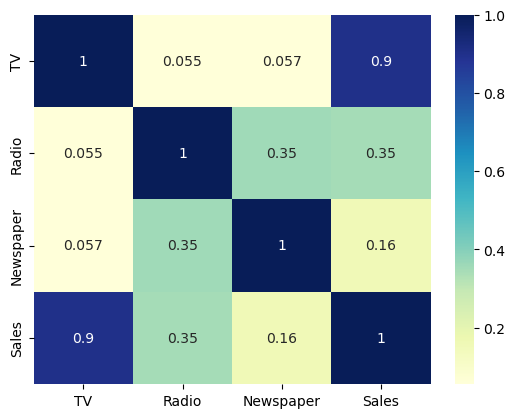

In [99]:
# Let's see the correlation between different variables.

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

###### As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales.

### Model Building

In [106]:
# Assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

X = df['TV']
y= df['Sales']

In [107]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [108]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [109]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

### Simple Linear Regression Model

Equation of linear regression

y = c + m1X1 + m2X2 +...+ mnXn
 
y is the response
c is the intercept
m1 is the coefficient for the first feature
mn is the coefficient for the nth feature

In our case: y= c + m1×TV
The m values are called the model coefficients or model parameters.

In [111]:
import statsmodels.api as sm

In [112]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [113]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [114]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        19:36:58   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

The values we are concerned with are -

1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance


The coefficient for TV is 0.054, with a very low p value. The coefficient is statistically significant. So the association is not purely by chance.

R - squared is 0.816, Meaning that 81.6% of the variance in Sales is explained by TV
This is a decent R-squared value.

F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales = 6.948 + 0.054×TV

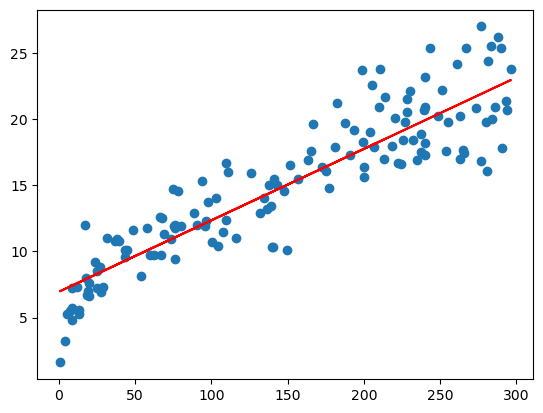

In [117]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

### Predictions on the Test Set

In [118]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [120]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [123]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [124]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

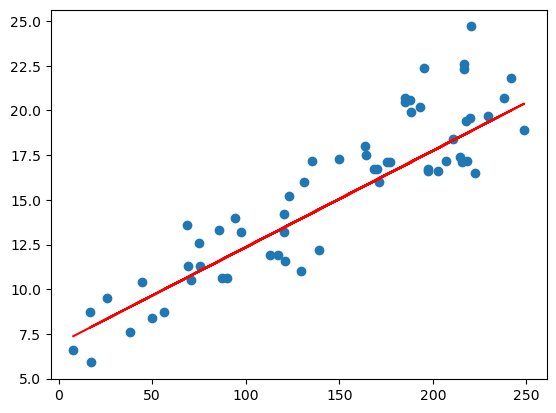

In [125]:
# Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()